# <center> <div style="width: 370px;"> ![depth First Search](pictures/depth_First_Search.jpg)

# <center> Depth First Search

A breadth-first search (BFS) explores vertices reachable from a queried vertex s level-by-level outward from s. In contrast, a depth-first search (DFS) discovers all reachable vertices from s by going as deep as possible along one branch before exploring other branches. Instead of systematically examining all neighbors of s, as in BFS, DFS delves as far as possible from the first neighbor of s before investigating any other neighbor. Similar to BFS, DFS returns a set of parent pointers for vertices reachable from s, forming a DFS tree. However, unlike a BFS tree, a DFS tree does not necessarily represent the shortest paths in an unweighted graph. Additionally, DFS provides an order in which vertices were discovered, a topic we will delve into later.

Below is Python code implementing a recursive depth-first search for a graph represented using index-labeled adjacency lists:

```python
def dfs(Adj, s, parent=None, order=None):  # Adj: adjacency list, s: start
    if parent is None:  # O(1) initialize parent list
        parent = [None for v in Adj]  # O(V) (use a hash if unlabeled)
    parent[s] = s  # O(1) root
    order = []  # O(1) initialize order array
    for v in Adj[s]:  # O(Adj[s]) loop over neighbors
        if parent[v] is None:  # O(1) parent not yet assigned
            parent[v] = s  # O(1) assign parent
            dfs(Adj, v, parent, order)  # Recursive call
    order.append(s)  # O(1) amortized
    return parent, order
```

**Time Complexity of Depth-First Search (DFS):**

The time complexity of depth-first search is efficient. A recursive DFS call is made only when a vertex lacks a parent pointer and receives one immediately before the recursive call. Thus, DFS is called on each vertex at most once. Furthermore, the work performed by each recursive search from vertex v is proportional to the out-degree (deg(v)) of v. Therefore, the total work done by depth-first search is O(deg(v)) = O(|E|). Since the parent array returned has a length of |V|, depth-first search runs in O(|V| + |E|) time.

### Summarize

#### Depth-First Search (DFS)

- DFS is a graph traversal algorithm, similar to BFS.
- It solves the Single Source Reachability problem and is useful for solving other problems later on.
- DFS returns a parent tree with parent pointers back to the starting vertex s.
- The main idea behind DFS is to visit outgoing adjacencies recursively while ensuring that each vertex is visited only once.
- It follows any path until it reaches a dead end, then backtracks to find an unexplored path to continue.
- Initially, P(s) is set to None, and then we run the `visit(s)` function.
- In the `visit(u)` function:
    - For every vertex v in the adjacency list of u that hasn't appeared in P:
        - `Set P(v)` = u and recursively call `visit(v)`.
    - DFS finishes visiting vertex u for later use.

### DFS Classification

The edges we traverse as we execute a Depth_First_Search can be classification into four edge type:

1. if `v` visited for first time as traverse the edge `(u, v)`, then the edge is a tree edge.

2. else `v` has already been visited:
     - a -> if `v` is an cestor of `u`, then edge `(u, v)` is a back edgs.
     - b -> else, if `v` is a descendant of `u` , then edge `(u, v)` is a forward edge.
     - c -> else, if `v` is neither an ancestor or descendant of `u`, then edge `(u, v)` is a cross edge.

# <center> <div style="width: 370px;"> 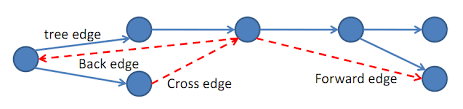

### Correctness

- Claim: DFS correctly visits vertex `v` and sets `P(v)` for every vertex `v` reachable from `s`.
- Proof: Induct on `k`, considering only vertices within distance `k` from `s`.
  - Base case `(k = 0): P(s)` is set correctly for `s`, and `s` is visited.
  - Inductive step: Consider vertex `v` with `δ(s, v) = k0 + 1`.
    - Consider vertex `u`, the second-to-last vertex on some shortest path from `s` to `v`.
    - By induction, since `δ(s, u) = k0`, DFS visits u and sets `P(u)` correctly.
    - While visiting `u`, DFS considers `v` in the adjacency list of `u`.
    - Either `v` is in `P`, so it has already been visited, or `v` will be visited while visiting `u`.
    - In either case, `v` will be visited by DFS and will be added correctly to `P`.


#### Running Time

- The algorithm visits each vertex u at most once and spends `O(1)` time for each `v` in `Adj(u)`.
- The total work is upper-bounded by `O(1) × deg(u) = O(|E|) for u ∈ V`.
- Unlike BFS, which returns distances for each vertex, DFS runs in `O(|E|)` time.


#### Full-BFS and Full-DFS

- If the goal is to explore the entire graph, not just vertices reachable from one vertex:
- The idea is to repeat a graph search algorithm A on any unvisited vertex.
- The process continues until all vertices have been visited:
  - Choose an arbitrary unvisited vertex s and use algorithm A to explore all vertices reachable from s.
- This algorithm is called Full-A, specifically Full-BFS or Full-DFS if A is BFS or DFS.
- Both Full-BFS and Full-DFS visit every vertex once, so they run in `O(|V| + |E|)` time.


### DFS Edge Classification

When analyzing depth-first search (DFS) and proving properties about it, it can be valuable to classify the edges of a graph based on their relationship to the DFS tree. Let's consider an edge in the graph that goes from vertex u to vertex v.

1. **Tree Edge:** An edge is classified as a tree edge if it is part of the DFS tree. In other words, if `parent[v] = u`, then the edge from u to v is a tree edge.
2. **Back Edge:** If the edge from u to v is not a tree edge and u is a descendant of v in the DFS tree, then it is categorized as a back edge.
3. **Forward Edge:** Conversely, if the edge from u to v is not a tree edge and v is a descendant of u in the DFS tree, it is referred to as a forward edge.
4. **Cross Edge:** If neither u nor v are descendants of each other in the DFS tree, then the edge is termed a cross edge.

These classifications help us better understand the relationships between vertices during a DFS traversal and are particularly useful when proving properties related to DFS.

### Topological Sort

A **Directed Acyclic Graph (DAG)** is a directed graph that contains no directed cycles.

A **Topological Order** of a graph G = (V, E) is an ordering f on the vertices such that for every edge (u, v) ∈ E, vertex u appears before vertex v in the ordering.

**How to find a topological order?**

One approach is to use a **Finishing Order**, which is the order in which a Full-DFS (Depth-First Search) finishes visiting each vertex in G.

**Claim:** If G = (V, E) is a DAG, the reverse of the finishing order is a topological order.

**Proof:** To demonstrate this, we need to show that for every edge (u, v) ∈ E, vertex u is ordered before v, meaning the visit to v finishes before visiting u. There are two cases:

1. If u is visited before v:
   - Before the visit to u finishes, we will visit v (via (u, v) or otherwise).
   - Thus, the visit to v finishes before visiting u.

2. If v is visited before u:
   - u can't be reached from v since the graph is acyclic.
   - Thus, the visit to v finishes before visiting u.

By reversing the order returned by DFS, we obtain a topological sort order on the vertices.

### Pseudocode

``` algorithm
dfs from v1:
    mark v1 as seen.
    for each of v1's unvisited neighbors n:
        dfs(n)
```

### DFS that finds a path

```algorithm
dfs from v1 to v2:
    mark v1 as visited, and add to the path.
    for each of v1's unvisited neighbors n to v2:
        if dfs(n, v2) succeeds:
            a path is found! yay!
        if all neighbors fail:
            remove v1 from the path.
```

### Cycle Detection

- Full-DFS can find a topological order if a graph G = (V, E) is acyclic.
- If the reverse finishing order for Full-DFS is not a topological order, G must contain a cycle.
- To check if G is acyclic: for each edge (u, v), verify if v comes before u in the reverse finishing order.
- This can be accomplished in O(|E|) time using a hash table or a direct access array.
- To return such a cycle, maintain the set of ***ancestors*** along the path back to s in Full-DFS.
- **Claim:** If G contains a cycle, Full-DFS will traverse an edge from v to an ancestor of v.
- **Proof:** Consider a cycle $(v_0, v_1, ..., v_k, v_0)$ in G
  - Without loss of generality, let v0 be the first vertex visited by Full-DFS on the cycle
  - For each vi, before the visit to vi finishes, it will visit $v_{i+1}$ and complete
  - It will consider the edge $(vi, v_{i+1})$, and if vi+1 has not been visited, it will be visited now
  - Thus, before the visit to $v_0$ finishes, vk will be visited (for the first time, by v0's assumption)
  - So, before the visit to $v_k$ finishes, it will consider $(v_k, v_0)$, where $v_0$ is an ancestor of $v_k$.